In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("/home/pat/terliuk/software/DARWIN/DecayFitter/")

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=[15.0,12.0]
plt.rcParams['axes.linewidth']=1
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.major.width']=1
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.minor.width']=1
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.major.width']=1
plt.rcParams['ytick.minor.size']=4
plt.rcParams['ytick.minor.width']=1
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize'] =24
plt.rcParams['legend.fontsize']= 24
plt.rcParams['legend.framealpha'] = 0.95
plt.rcParams['legend.handlelength']=2.0
plt.rcParams['figure.facecolor']="w"
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [3]:
from scipy import integrate

In [4]:
from AnalyticCalculator import AnalyticCalculator

In [5]:
bin_edges = np.linspace(2200, 2800, 31)
#bin_edges = np.linspace(2435, 2481, 101)
ltime = 10.
calc = AnalyticCalculator(bin_edges, 
                         livetime=ltime, 
                         )

In [6]:
xvals = np.linspace(2000,3000,10001)

In [7]:
calc.AXe136=0.28157
comps = calc.getBinnedComponents(calc.AXe136, calc.Scale208Tl, calc.Norm214Bi, 
                                 calc.NormCont, calc.ContSlope, calc.Scale137Xe, calc.T12_136Xe_2vbb)

In [25]:
calc.ContSlope= -11.0
calc.cache_histograms()

In [26]:
#comps['44Sc']

In [27]:
#comps

In [28]:
peaks_208Tl = calc.spectrum_208Tl_peaks_noscale(xvals)
cont_208Tl = calc.spectrum_208Tl_continuum_noscale(xvals)

peaks_214Bi = calc.spectrum_214Bi_peaks_noscale(xvals)
cont_214Bi = calc.spectrum_214Bi_continuum_noscale(xvals)

peaks_44Sc = calc.spectrum_44Sc_peaks_noscale(xvals)
cont_44Sc = calc.spectrum_44Sc_continuum_noscale(xvals)

tot_208Tl = calc.spectrum_208Tl(xvals)
tot_44Sc = calc.spectrum_44Sc(xvals)
tot_214Bi = calc.spectrum_214Bi(xvals)

tot_136Xe_2vbb = calc.spectrum_136Xe_2vbb(xvals)
tot_137Xe = calc.spectrum_137Xe(xvals)
tot_8B = calc.spectrum_8B(xvals)
tot_222Rn = calc.spectrum_222Rn(xvals)
tot_136Xe_0vbb = calc.spectrum_136Xe_0vbb_noscale(xvals)

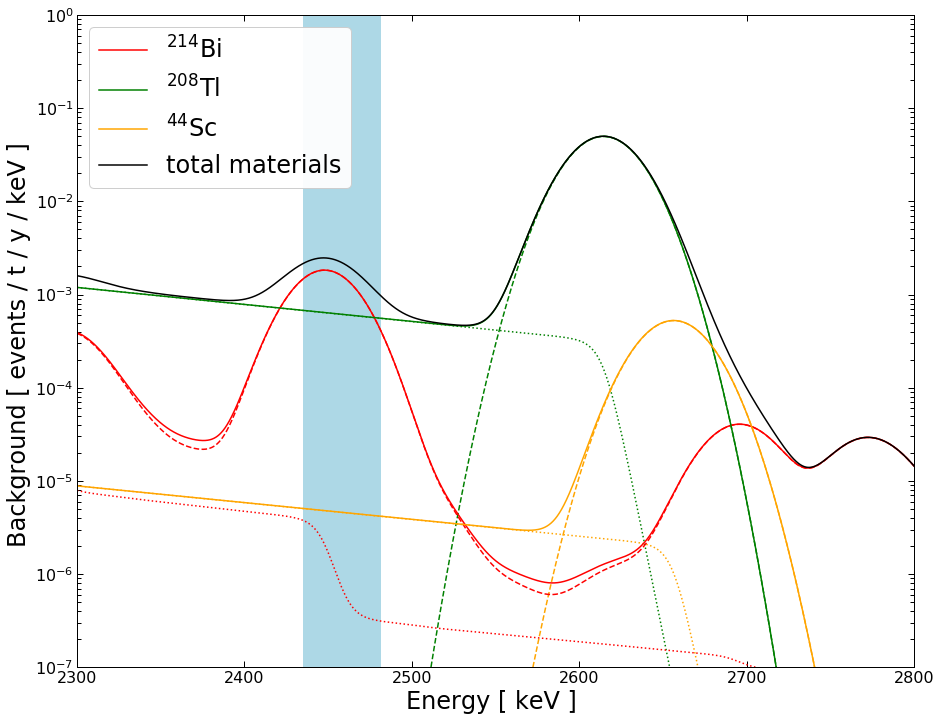

In [29]:
plt.plot(xvals, peaks_208Tl*calc.Scale208Tl, color="g", ls ="--")#, label = "${}^{208}$Tl (peak)")
plt.plot(xvals, cont_208Tl*calc.ContScale_208Tl, color="g", ls =":")#, label = "${}^{208}$Tl (cont.)")

plt.plot(xvals, peaks_44Sc*calc.Scale44Sc, color="orange", ls ="--")#, label = "${}^{44}$Sc (peak)")
plt.plot(xvals, cont_44Sc*calc.ContScale_44Sc, color="orange", ls =":")#, label = "${}^{44}$Sc (cont.)")

plt.plot(xvals, peaks_214Bi*calc.Scale214Bi, color="r", ls ="--")#, label = "${}^{214}$Bi (cont.)")
plt.plot(xvals, cont_214Bi*calc.ContScale_214Bi, color="r", ls =":")#, label = "${}^{214}$Bi (cont.)")

plt.plot(xvals, tot_214Bi, color="r", ls ="-", label = "${}^{214}$Bi")
plt.plot(xvals, tot_208Tl, color="g", ls ="-", label = "${}^{208}$Tl")
plt.plot(xvals, tot_44Sc, color="orange", ls ="-", label = "${}^{44}$Sc")

plt.plot(xvals, tot_44Sc+tot_214Bi+tot_208Tl, color="k", ls ="-", label = "total materials")

plt.legend()


#plt.plot(xvals, calc.continuum(xvals, 2614.511, -12)+peak_vals)
plt.xlim(2300, 2800)
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.xlabel("Energy [ keV ] ")
plt.ylabel("Background [ events / t / y / keV ] ")
plt.fill_betweenx([1e-10, 10],[2435, 2435], [2481., 2481], color ="lightblue")

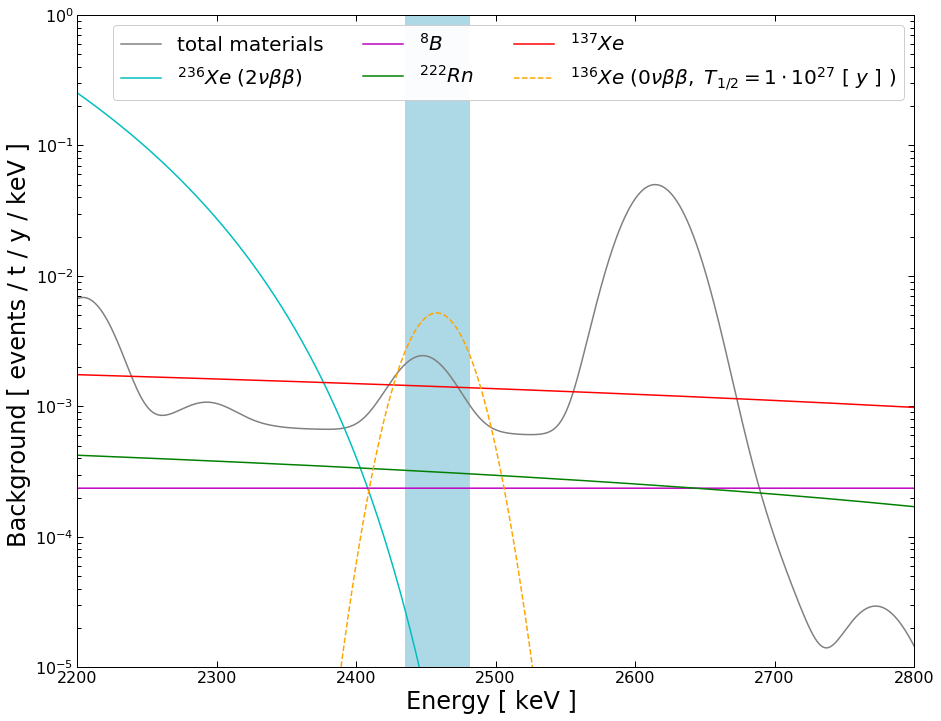

In [18]:
plt.plot(xvals, tot_44Sc+tot_214Bi+tot_208Tl, color="0.5", ls ="-", label = "total materials")
plt.plot(xvals, tot_136Xe_2vbb, color="c", ls ="-", label = r"${}^{236}Xe \ (2\nu\beta\beta)$")
plt.plot(xvals, tot_8B, color="m", ls ="-", label = r"${}^{8}B$")
plt.plot(xvals, tot_222Rn, color="g", ls ="-", label = r"${}^{222}Rn$")
plt.plot(xvals, tot_137Xe, color="r", ls ="-", label = r"${}^{137}Xe$")
plt.plot(xvals, calc.AXe136*tot_136Xe_0vbb, color="orange", ls ="--", label = r"${}^{136}Xe\ (0\nu\beta\beta,\ T_{1/2}=1\cdot10^{27}\ [ \ y \ ]\ )$")
plt.legend(ncol=3, fontsize=20)

#plt.plot(xvals, calc.continuum(xvals, 2614.511, -12)+peak_vals)
plt.xlim(2200, 2800)
plt.yscale("log")
plt.ylim(1e-5, 1)
plt.xlabel("Energy [ keV ] ")
plt.ylabel("Background [ events / t / y / keV ] ")
plt.fill_betweenx([1e-10, 10],[2435, 2435], [2481., 2481], color ="lightblue")

In [55]:
comps = calc.getBinnedComponents(calc.AXe136, calc.Scale208Tl, calc.Norm214Bi, 
                                 calc.NormCont, -10.0, calc.Scale137Xe, calc.T12_136Xe_2vbb)

In [56]:
total_with_sig = np.zeros(len(bin_edges)-1)
total_no_sig = np.zeros(len(bin_edges)-1)
for key in comps.keys():
    total_with_sig+=comps[key]
    if key!="136Xe_0vbb": total_no_sig+=comps[key]

In [57]:
tot_208Tl = calc.spectrum_208Tl(xvals)
tot_44Sc = calc.spectrum_44Sc(xvals)
tot_214Bi = calc.spectrum_214Bi(xvals)

tot_136Xe_2vbb = calc.spectrum_136Xe_2vbb(xvals)
tot_137Xe = calc.spectrum_137Xe(xvals)
tot_8B = calc.spectrum_8B(xvals)
tot_222Rn = calc.spectrum_222Rn(xvals)
tot_136Xe_0vbb = calc.AXe136*calc.spectrum_136Xe_0vbb_noscale(xvals)

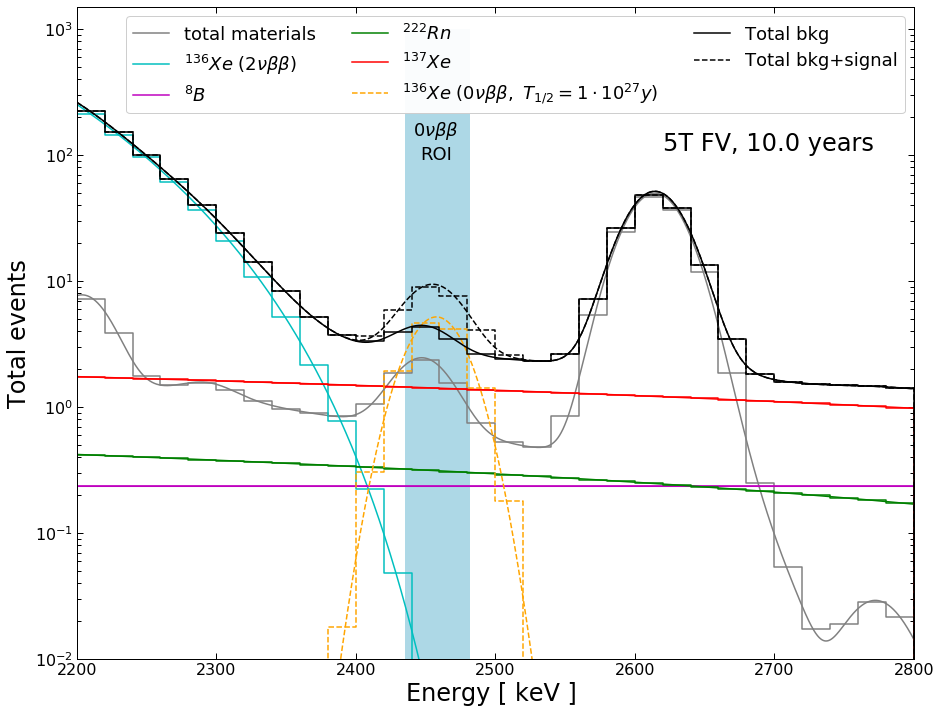

In [58]:
rate_scale = calc.fidMass*calc.livetime*(bin_edges[1] - bin_edges[0])


plt.plot(xvals, rate_scale*(tot_44Sc+tot_214Bi+tot_208Tl), color="0.5", ls ="-", label = "total materials")
plt.step(bin_edges, np.append(comps['44Sc']+comps['214Bi'] + comps['208Tl'], [0]),
         where = "post", color="0.5")

plt.plot(xvals, rate_scale*tot_136Xe_2vbb, color="c", ls ="-", label = r"${}^{136}Xe \ (2\nu\beta\beta)$")
plt.step(bin_edges, np.append([comps['136Xe_2vbb']], [0]),
         where = "post", color="c")

plt.plot(xvals, rate_scale*tot_8B, color="m", ls ="-", label = r"${}^{8}B$")
plt.step(bin_edges, np.append([comps['8B']], [0]),
         where = "post", color="m")

plt.plot(xvals, rate_scale*tot_222Rn, color="g", ls ="-", label = r"${}^{222}Rn$")
plt.step(bin_edges, np.append([comps['222Rn']], [0]),
         where = "post", color="g")
plt.plot(xvals, rate_scale*tot_137Xe, color="r", ls ="-", label = r"${}^{137}Xe$")
plt.step(bin_edges, np.append([comps['137Xe']], [0]),
         where = "post", color="r")


plt.plot(xvals, rate_scale*tot_136Xe_0vbb, color="orange", ls ="--", 
         label = r"${}^{136}Xe\ (0\nu\beta\beta,\ T_{1/2} = 1 \cdot 10^{27} y)$")
plt.step(bin_edges, np.append([comps['136Xe_0vbb']], [0]),
         where = "post", color="orange", ls = "--")

plt.plot(xvals, rate_scale*(tot_44Sc+tot_214Bi+tot_208Tl+tot_136Xe_2vbb+tot_8B+tot_222Rn+tot_137Xe),
         color="k", ls= "-", label = "Total bkg")
plt.step(bin_edges, np.append(total_no_sig, [0]),
         where = "post", color="k", ls = "-")
###
plt.plot(xvals, rate_scale*(tot_44Sc+tot_214Bi+tot_208Tl+tot_136Xe_2vbb+tot_8B+tot_222Rn+tot_137Xe+tot_136Xe_0vbb),
         color="k", ls= "--", label ="Total bkg+signal")

plt.step(bin_edges, np.append(total_with_sig, [0]),
         where = "post", color="k", ls = "--")
#
plt.text(2457.8, 155, r"$0 \nu \beta \beta$", va = "center", ha = "center", fontsize = 18)
plt.text(2457.8, 100, r"ROI", va = "center", ha = "center", fontsize = 18)
plt.legend(ncol=3, fontsize=18)
plt.xlim(2200, 2800)
plt.yscale("log")
plt.ylim(1e-2, 1500)

plt.text(0.7,0.78, "%iT FV, %0.1f years"%(calc.fidMass, calc.livetime), 
            transform=plt.gca().transAxes, fontsize = 24)

plt.xlabel("Energy [ keV ] ")
plt.ylabel("Total events")
plt.fill_betweenx([1e-10, 1000],[2435, 2435], [2481., 2481], color ="lightblue")